In [1]:
import numpy as np
import pandas as pd

- 나이, 포지션 제외 기본 누석 성적 40개만 
- 회귀 분석

In [3]:
df = pd.read_csv("C://Users//JH//Desktop//B_FA_test.csv")

In [4]:
df.head()

,year,name,period,salary,AGE,POS,G,PA,AB,R,...,RBI_T,SB_T,CS_T,BB_T,HBP_T,IBB_T,SO_T,GDP_T,SAC_T,SF_T
0,2010,김상훈,1,11.75675,32,12.5,124,441,379,35,...,376,15,14,241,31,5,556,77,91,23
1,2010,장성호,1,2.86750,32,-7.5,88,312,271,39,...,882,96,47,863,62,72,664,128,27,46
2,2010,박재홍,1,9.17600,36,-7.5,113,376,315,53,...,1024,262,141,823,63,60,1052,140,17,66
3,2010,최기문,1,1.72050,36,12.5,54,136,115,17,...,270,46,30,216,47,10,322,42,82,13
4,2010,박한이,1,7.45550,30,-7.5,110,394,334,48,...,436,109,71,567,52,21,492,90,72,28


In [5]:
X = df.drop(["year", "name", "period", "salary"], axis=1).values
y = df["salary"].values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression().fit(X_train_scaled, y_train)

In [8]:
print("스케일링 된 훈련 세트 점수: {:.2f}".format(lr.score(X_train_scaled, y_train)))
print("스케일링 된 테스트 세트 점수: {:.2f}".format(lr.score(X_test_scaled, y_test)))

스케일링 된 훈련 세트 점수: 0.89
스케일링 된 테스트 세트 점수: 0.25


- 과대적합이 일어남

In [9]:
from sklearn.linear_model import Ridge

ridge10 = Ridge(alpha = 10).fit(X_train_scaled, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train_scaled, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test_scaled, y_test)))

ridge01 = Ridge(alpha = 0.1).fit(X_train_scaled, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train_scaled, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test_scaled, y_test)))

훈련 세트 점수: 0.51
테스트 세트 점수: 0.65
훈련 세트 점수: 0.83
테스트 세트 점수: 0.80


- 계수를 모두 사용하면서 규제를 주고 싶어 Ridge 모형을 사용
- 안정화된 것 같음

In [11]:
# 참고

from regressors import stats 

stats.coef_pval(ridge01, X_train_scaled, y_train)
stats.summary(ridge01, X_train_scaled, y_train)

Residuals:
Min      1Q  Median      3Q     Max
-5.7426 -1.9251  0.3945  1.6115  6.5133


Coefficients:
             Estimate            Std. Error       t value   p value
_intercept   7.988409    (136379.634016-0j)   (0.0001+0j)  0.999953
x1         -10.859697         (2.637496+0j)  (-4.1174+0j)  0.000130
x2           5.575489         (1.554104+0j)   (3.5876-0j)  0.000710
x3          -8.937138         (5.719372-0j)  (-1.5626-0j)  0.123881
x4           0.115215      (1416.004709-0j)   (0.0001+0j)  0.999935
x5           0.468659      (1066.153956-0j)   (0.0004+0j)  0.999651
x6           7.712825         (8.640483-0j)   (0.8926+0j)  0.375940
x7           5.913674  (11949256.212369+0j)           -0j  1.000000
x8          -0.284038    (575393.413492+0j)       (-0+0j)  1.000000
x9          -0.692015      (20553.47081+0j)       (-0+0j)  0.999973
x10         -5.926336   (2230061.565944+0j)       (-0+0j)  0.999998
x11          2.067158  (28638922.032872+0j)           -0j  1.000000
x12          

In [10]:
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha=0.1)
scores = cross_val_score(ridge, X_train_scaled, y_train, cv=2)
print("교차 검증 점수: {}".format(scores))
print("교차 검증 평균 점수: {:.2f}".format(scores.mean()))

교차 검증 점수: [-0.15709705  0.25717065]
교차 검증 평균 점수: 0.05


- 교차 검증을 하기에 데이터셋이 턱없이 부족한 것 같다.
- 차라리 데이터 분할할 때 random_state를 바꾸며 평균을 내면?
    - 테스트셋의 가치가 없어짐..


- 부트스트랩이나 앙상블 모델 사용?
    - 지금 목적은 순수하게 회귀 분석 종류만 사용해서 결과를 내는 것
    

- 검증셋을 만들어서 다시 진행해 보자

In [11]:
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, random_state=0)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=0)

print("훈련 세트의 크기: {}    검증 세트의 크기: {}    테스트 세트의 크기: {}"
     "\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

훈련 세트의 크기: 42    검증 세트의 크기: 14    테스트 세트의 크기: 19



- 이런 방식으로 그리드 서치도 함께 진행

In [12]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

grid_search.fit(X_train_scaled, y_train)

C:\Users\JH\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [13]:
print("훈련 세트 점수: {:.2f}".format(grid_search.score(X_train_scaled, y_train)))
print("테스트 세트 점수: {:.2f}".format(grid_search.score(X_test_scaled, y_test)))

훈련 세트 점수: 0.51
테스트 세트 점수: 0.65


- 과소적합인 것으로 보임
- 다른 패키지도 써보고 스케일링도 해봤지만 마찬가지
- 표본이 너무 적어서 데이터셋이 어떻게 갈리느냐에 따라 최적 매개변수 변동 너무 심함..
- 비교적 안정되어 보이던 alpha=0.1의 Ridge 모델을 선택 

In [15]:
df_2019 = pd.read_csv("C://Users//JH//Desktop//B_FA_2019.csv")

In [16]:
df_2019_2 = df_2019[df_2019.name != "김민성"]
df_2019_2 = df_2019_2.reset_index(drop=True)

X_2019 = df_2019_2.drop(["year", "name", "period", "salary"], axis=1).values
y_2019 = df_2019_2["salary"].values

X_2019_scaled = scaler.transform(X_2019)

In [17]:
ridge = Ridge(alpha = 0.2).fit(X_train_scaled, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train_scaled, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test_scaled, y_test)))
print("2019년 세트 점수: {:.2f}".format(ridge.score(X_2019_scaled, y_2019)))

훈련 세트 점수: 0.81
테스트 세트 점수: 0.81
2019년 세트 점수: 0.71


In [18]:
print("2019년 계약 예측\n{}".format(ridge.predict(X_2019_scaled)))

2019년 계약 예측
[26.69704613  8.48045564 21.90933921 16.04963415 11.14634502 14.10978357
  4.31405    13.86380354  7.98135671  6.81130612]


In [19]:
pred = ridge.predict(X_2019_scaled)
pred_df = pd.DataFrame(list(pred))
result = pd.concat([df_2019_2['name'], df_2019_2['salary'].round(1), pred_df.round(1)], axis=1)
result.columns = ['선수명', '계약규모', '예측규모']
result.sort_values(by="계약규모", ascending=False)

,선수명,계약규모,예측규모
0,양의지,35.8,26.7
2,최정,17.7,21.9
3,이재원,17.2,16.0
8,박용택,12.5,8.0
5,이용규,8.7,14.1
9,박경수,8.7,6.8
4,송광민,8.0,11.1
1,모창민,6.7,8.5
7,김상수,6.0,13.9
6,최진행,2.5,4.3


In [20]:
import matplotlib.pyplot as plt

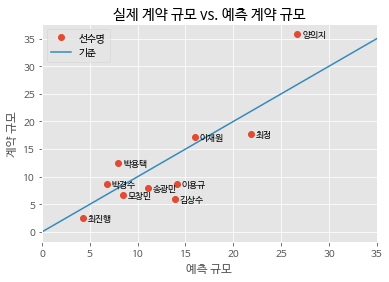

In [21]:
plt.style.use('ggplot')

names = pd.Series(result['선수명'])

plt.plot(result['예측규모'], result['계약규모'], 'o', label="선수명")
plt.plot((0, 35), (0, 35), label="기준")

plt.xlim(0, 35)
plt.title("실제 계약 규모 vs. 예측 계약 규모")
plt.xlabel("예측 규모")
plt.ylabel("계약 규모")
plt.legend(loc="best")
for i,name in enumerate(names):
    x = result['예측규모'][i]
    y = result['계약규모'][i]
    plt.text(x+0.5, y-0.6, name, fontsize=9)

In [20]:
df2 = pd.read_csv("C://Users//JH//Desktop//P_FA_test.csv")

X2 = df2.drop(["year", "name", "period", "salary"], axis=1).values
y2 = df2["salary"].values

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state = 0)

scaler = MinMaxScaler()
scaler.fit(X_train2)

X_train_scaled2 = scaler.transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

lr2 = LinearRegression().fit(X_train_scaled2, y_train2)

In [21]:
print("스케일링 된 훈련 세트 점수: {:.2f}".format(lr2.score(X_train_scaled2, y_train2)))
print("스케일링 된 테스트 세트 점수: {:.2f}".format(lr2.score(X_test_scaled2, y_test2)))

스케일링 된 훈련 세트 점수: 1.00
스케일링 된 테스트 세트 점수: 0.58


In [22]:
ridge03_2 = Ridge(alpha = 0.3).fit(X_train_scaled2, y_train2)
print("훈련 세트 점수: {:.2f}".format(ridge03_2.score(X_train_scaled2, y_train2)))
print("테스트 세트 점수: {:.2f}".format(ridge03_2.score(X_test_scaled2, y_test2)))

ridge02_2 = Ridge(alpha = 0.2).fit(X_train_scaled2, y_train2)
print("훈련 세트 점수: {:.2f}".format(ridge02_2.score(X_train_scaled2, y_train2)))
print("테스트 세트 점수: {:.2f}".format(ridge02_2.score(X_test_scaled2, y_test2)))

훈련 세트 점수: 0.96
테스트 세트 점수: 0.87
훈련 세트 점수: 0.97
테스트 세트 점수: 0.87


In [23]:
df2_2019 = pd.read_csv("C://Users//JH//Desktop//P_FA_2019.csv")

df2_2019_2 = df2_2019[df2_2019.name != "노경은"]
df2_2019_2 = df2_2019_2.reset_index(drop=True)

X2_2019 = df2_2019_2.drop(["year", "name", "period", "salary"], axis=1).values
y2_2019 = df2_2019_2["salary"].values

X2_2019_scaled = scaler.transform(X2_2019)

In [24]:
ridge2 = Ridge(alpha = 1.1).fit(X_train_scaled2, y_train2)
print("훈련 세트 점수: {:.2f}".format(ridge2.score(X_train_scaled2, y_train2)))
print("테스트 세트 점수: {:.2f}".format(ridge2.score(X_test_scaled2, y_test2)))
print("2019년 세트 점수: {:.2f}".format(ridge2.score(X2_2019_scaled, y2_2019)))

훈련 세트 점수: 0.88
테스트 세트 점수: 0.83
2019년 세트 점수: -12.08


In [25]:
print("2019년 계약 예측\n{}".format(ridge2.predict(X2_2019_scaled)))

2019년 계약 예측
[ 9.66539104 11.9143331  20.33550858]


In [26]:
pred2 = ridge2.predict(X2_2019_scaled)
pred_df2 = pd.DataFrame(list(pred2))
result2 = pd.concat([df2_2019_2['name'], df2_2019_2['salary'].round(1), pred_df2.round(1)], axis=1)
result2.columns = ['선수명', '실제연봉', '예측연봉']
result2.sort_values(by="실제연봉", ascending=False)

,선수명,실제연봉,예측연봉
1,윤성환,10.0,11.9
0,이보근,4.8,9.7
2,금민철,3.5,20.3


In [27]:
coef = pd.DataFrame(list(ridge.coef_.round(2)))
colname = pd.DataFrame(df.drop(["year", "name", "period", "salary"], axis=1).columns)

coeffi = pd.concat([colname, abs(coef)], axis=1)
coeffi.columns = ['요인', '계수']
coeffisort = coeffi.sort_values(by="계수", ascending=False)
coeffisort = coeffisort.reset_index(drop=True)
coeffisort

,요인,계수
0,AGE,10.35
1,IBB,8.26
2,G,7.87
3,HBP,7.54
4,RBI,7.51
5,H_T,6.39
6,RBI_T,6.36
7,SO,6.31
8,R,5.66
9,H,5.29


In [28]:
coef2 = pd.concat([colname, coef], axis=1)
coef2.columns = ['요인', '계수']
cogroup = []

for i in range(40):
    if coef2["계수"][i] >= 0:
        cogroup.append(1)
    else:
        cogroup.append(0)
        
cogroup_list = pd.Series(cogroup)
coef2 = pd.concat([colname, abs(coef), cogroup_list], axis=1)
coef2.columns = ['요인', '계수', '그룹']

coef2

coef2sort = coef2.sort_values(by="계수", ascending=False)
coeffisort = coef2sort.reset_index(drop=True)
coeffisort

,요인,계수,그룹
0,AGE,10.35,0
1,IBB,8.26,1
2,G,7.87,0
3,HBP,7.54,1
4,RBI,7.51,1
5,H_T,6.39,1
6,RBI_T,6.36,1
7,SO,6.31,0
8,R,5.66,1
9,H,5.29,1


Text(0.5, 0, '요인')

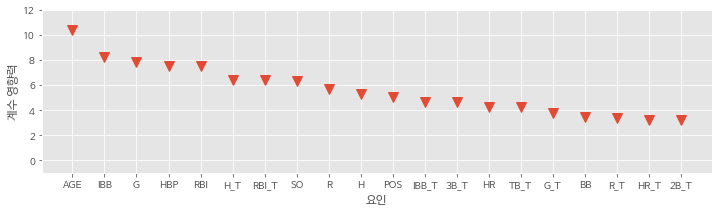

In [29]:
plt.figure(figsize=(12, 3))
plt.plot((coeffisort["계수"][:20]), 'v', markersize=10)
plt.xticks(range(20), coeffisort["요인"][:20])
plt.ylim(-1, 12)
plt.ylabel("계수 영향력")
plt.xlabel("요인")

In [30]:
coeffisort["계수"][:20]

0     10.35
1      8.26
2      7.87
3      7.54
4      7.51
5      6.39
6      6.36
7      6.31
8      5.66
9      5.29
10     5.07
11     4.67
12     4.63
13     4.25
14     4.24
15     3.74
16     3.42
17     3.38
18     3.24
19     3.21
Name: 계수, dtype: float64

In [31]:
coeffisort = coeffisort[:20]

In [32]:
group0 = coeffisort["계수"] - coeffisort["계수"] + coeffisort["계수"][coeffisort['그룹']==0]

In [33]:
group1 = coeffisort["계수"] - coeffisort["계수"] + coeffisort["계수"][coeffisort['그룹']==1]

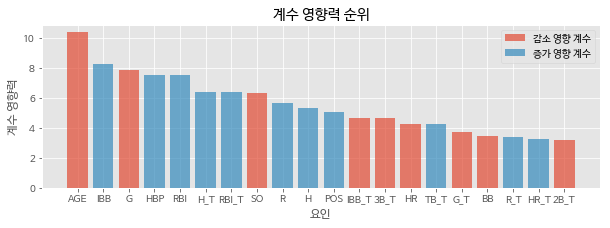

In [34]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 3))

plt.bar(coeffisort["요인"], group0, label="감소 영향 계수", alpha = 0.7)
plt.bar(coeffisort["요인"], group1, label="증가 영향 계수", alpha = 0.7)

plt.title("계수 영향력 순위")
plt.ylabel("계수 영향력")
plt.xlabel("요인")
plt.legend(loc=1)

In [35]:
sal_team = pd.Series(['KIA', '두산', '롯데', 'NC', 'SK',
                     'LG', '넥센', '한화', '삼성', 'KT'])
sal_total = pd.Series([1086500, 730600, 995000, 533900, 820000,
                       807300, 582300, 883700, 730400, 538500])
sal_win = pd.Series([70, 93, 68, 58, 78,
                     68, 75, 77, 68, 59])

In [36]:
sal_1win = (sal_total / sal_win / 10000).round(2)
sal_1win

0    1.55
1    0.79
2    1.46
3    0.92
4    1.05
5    1.19
6    0.78
7    1.15
8    1.07
9    0.91
dtype: float64

In [37]:
sal_hap = pd.concat([sal_team, sal_1win], axis=1)
sal_hap.columns = ['팀명', '1승당']
sal_hap

,팀명,1승당
0,KIA,1.55
1,두산,0.79
2,롯데,1.46
3,NC,0.92
4,SK,1.05
5,LG,1.19
6,넥센,0.78
7,한화,1.15
8,삼성,1.07
9,KT,0.91


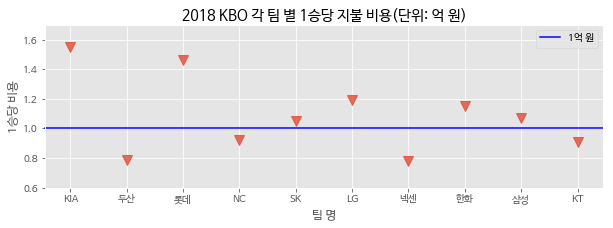

In [38]:
plt.figure(figsize=(10, 3))
plt.plot(sal_hap["1승당"], 'v', markersize=10, alpha=0.8, label="")
plt.xticks(range(sal_hap.shape[0]), sal_hap["팀명"])

plt.title("2018 KBO 각 팀 별 1승당 지불 비용(단위: 억 원)")
plt.ylim(0.6, 1.7)
plt.axhline(y = 1, clip_on = False, color='b', label="1억 원")
plt.ylabel("1승당 비용")
plt.xlabel("팀 명")
plt.legend(loc=1)

In [39]:
XX = df.drop(["year", "name", "period", "salary"], axis=1)

In [40]:
coef_mean = XX.mean()

In [41]:
coef_mean["AGE"] = 105.480000
coef_mean["POS"] = 105.480000

In [42]:
ridge.coef_*coef_mean

AGE     -1091.396922
POS       535.279336
G        -829.609176
PA        205.178606
AB        274.395926
R         287.068991
H         517.065261
2B          2.265079
3B         -1.306324
HR        -41.507531
TB        321.380574
RBI       381.743918
SB         12.064025
CS          2.132749
BB       -137.599316
HBP        38.708863
IBB        12.670650
SO       -381.954168
GDP         4.079610
SAC         9.544836
SF          8.708477
G_T     -4344.308087
PA_T    -1051.374019
AB_T      462.404624
R_T      1779.567579
H_T      6471.832892
2B_T     -565.350662
3B_T      -79.511666
HR_T      316.710849
TB_T     6431.208854
RBI_T    3155.653216
SB_T      132.196094
CS_T      -41.062348
BB_T     -843.007138
HBP_T      21.376682
IBB_T     -77.883200
SO_T     1220.764012
GDP_T     -10.319697
SAC_T     -89.166754
SF_T      -69.917549
dtype: float64

In [43]:
coef = pd.DataFrame(list((ridge.coef_*coef_mean)))
colname = pd.DataFrame(df.drop(["year", "name", "period", "salary"], axis=1).columns)

coeffi = pd.concat([colname, abs(coef)], axis=1)
coeffi.columns = ['요인', '계수']
coeffisort = coeffi.sort_values(by="계수", ascending=False)
coeffisort = coeffisort.reset_index(drop=True)

In [44]:
sum(abs(coef[0]))

32259.276260822666

In [45]:
coef2 = pd.concat([colname, coef], axis=1)
coef2.columns = ['요인', '계수']
cogroup = []

for i in range(40):
    if coef2["계수"][i] >= 0:
        cogroup.append(1)
    else:
        cogroup.append(0)
        
cogroup_list = pd.Series(cogroup)
coef2 = pd.concat([colname, abs(coef), cogroup_list], axis=1)
coef2.columns = ['요인', '계수', '그룹']

coef2

coef2sort = coef2.sort_values(by="계수", ascending=False)
coeffisort = coef2sort.reset_index(drop=True)

In [46]:
coeffisort = coeffisort[:20]
coeffisort["계수"] = coeffisort["계수"] / sum(abs(coef[0]))

In [47]:
group0 = coeffisort["계수"] - coeffisort["계수"] + coeffisort["계수"][coeffisort['그룹']==0]
group1 = coeffisort["계수"] - coeffisort["계수"] + coeffisort["계수"][coeffisort['그룹']==1]

In [48]:
nu = [coeffisort["계수"][0]]

for i in range(0, 19):
    su = nu[i] + coeffisort["계수"][i+1]
    nu.append(su)

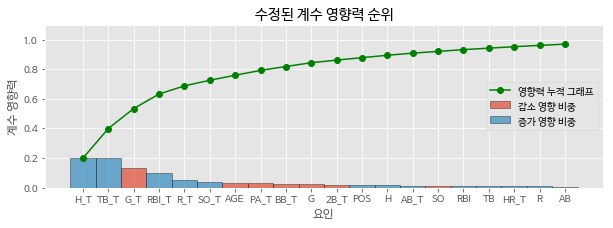

In [49]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 3))

plt.bar(coeffisort["요인"], group0, label="감소 영향 비중", alpha = 0.7, 
        width=1, edgecolor='black')
plt.bar(coeffisort["요인"], group1, label="증가 영향 비중", alpha = 0.7, 
        width=1, edgecolor='black')
plt.plot(coeffisort["요인"], nu, marker='o', linestyle='solid',
        color='g', label="영향력 누적 그래프")

plt.ylim(0, 1.1)
plt.title("수정된 계수 영향력 순위")
plt.ylabel("계수 영향력")
plt.xlabel("요인")
plt.legend(loc=5)